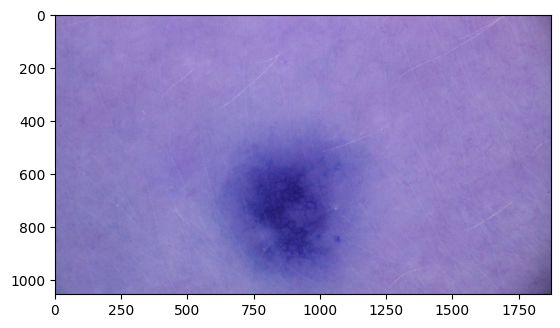

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

lesion_directory = r'C:\Users\agboo\TellME_ML_jpeg'
lesion_classes = ['Benign_Jpeg' , 'Malignant_jpeg']

for lesion in range(2):
    path = os.path.join(lesion_directory,lesion_classes[lesion])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)# reading a BGR type
        plt.imshow(img_array,cmap ="gray")
        plt.show()
        break
    break



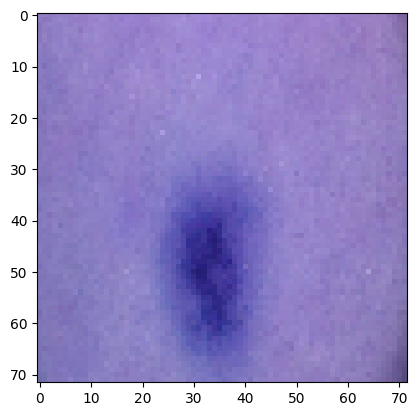

In [2]:
row = 72
col = 72 # creating new variable to resize and normalize the image
new_picture_size = cv2.resize(img_array,(col,row))
plt.imshow(new_picture_size,cmap = "gray")
plt.show()


In [3]:
# creating training dataset
training_data = []
def data_manage():
    for lesion in range(2):
        path = os.path.join(lesion_directory,lesion_classes[lesion])
        # now we will create our class catergorization with 1 being a malignant tumor and 0 being a benign lesion
        class_flag = lesion_classes.index(lesion_classes[lesion])
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                new_picture_size = cv2.resize(img_array,(col,row))
                training_data.append([new_picture_size,class_flag])
            except Exception as e:
                pass
data_manage()
        
        




In [4]:
print(len(training_data)) # all 1111 lesions have been accounted for


1111


In [5]:
import random # we are shiffling the data so the model dosent learn a binary where it osnly specifies one classification
random.shuffle(training_data)

In [6]:
X = [] # features
Y = [] 
for keys, labels in training_data: # append all classifications and features to respective array
    X.append(keys)
    Y.append(labels)
# you cant pass list to cnn so convert in to an array
# converting to numpy array and reshaping for features
X = np.array(X).reshape(-1,row,col , 3) # three "blue" , "green", "red" values
Y = np.array(Y)


In [7]:
# data has been created
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out) 
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()



In [9]:
# starting cnn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, Activation , Flatten , Conv2D , MaxPooling2D , RandomCrop , RandomContrast, RandomBrightness# maybe add Random Zoom,Reshape,Resize 
# the above recommendations are from looking at tensorflow documentation and trying to personalize to our data set
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard # allows you to keep track of ML algorithim

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

X = X/255.0 # giving us a normalization for every pixel (1-255) within the color RGB code , therefore a 255 convolution

Optimized_Model = ""


layer_size = [64,48]
conv_layers = [3,2]
dense_layers = [3,2]


for d_layer in dense_layers:
    for c_layer in conv_layers:
        for size in layer_size:
            Optimized_Model = str(c_layer) + "conv" + str(d_layer)+"nodes"+str(size)+"dense"
            tensor = TensorBoard(log_dir = 'logs/{}'.format(Optimized_Model))
            print(Optimized_Model)

            model = Sequential()
            model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))# convolutional layer , window size , 
            model.add(Activation("relu")) # allows for the model to be more flexible and jump node to node and recognize problems
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size = (2,2))) # maybe weights the convolution

            for i in range(len(conv_layers)-1):
                #model = tf.keras.Sequential()
                model.add(Conv2D(size,(3,3)))
                model.add(Activation("relu"))# allows for the model to be more flexible and jump node to node and recognize problems
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2))) # maybe weights the convolution
                #model = tf.keras.Sequential()
                model.add(Conv2D(size,(3,3)))
                model.add(Activation("relu"))# allows for the model to be more flexible and jump node to node and recognize problems
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2)))
                # maybe weights the convolution
                #model = tf.keras.Sequential()
                model.add(Conv2D(size,(3,3)))
                model.add(Activation("relu"))# allows for the model to be more flexible and jump node to node and recognize problems
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2))) # maybe weights the convolution
                # makes the convolution 4X64 , I think this may help since melanoma classification will need more detail
                # thus this is our first layer'
            model.add(Flatten())
            for i in range(len(dense_layers)):
                model.add(Dense(size))# takes 1D input so we must flatten
                model.add(Activation("relu"))
                #model.add(Activation("relu"))# this makes my accuracy of 10 epochs go from 80s to low 70s
                
            model.add(Dense(1))
            model.add(Activation("sigmoid"))


            model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])




            model.fit(X,Y, batch_size = 28, epochs = 28 ,validation_split= 0.1,callbacks = [tensor])
model.save("3conv3nodes48dense.keras")#saving model keras

3conv3nodes64dense
Epoch 1/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4879 - loss: 0.6945 - val_accuracy: 0.5536 - val_loss: 0.6787
Epoch 2/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5683 - loss: 0.6839 - val_accuracy: 0.5536 - val_loss: 0.6762
Epoch 3/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5953 - loss: 0.6673 - val_accuracy: 0.5893 - val_loss: 0.6524
Epoch 4/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.5926 - loss: 0.6664 - val_accuracy: 0.6429 - val_loss: 0.6615
Epoch 5/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6275 - loss: 0.6519 - val_accuracy: 0.6250 - val_loss: 0.6377
Epoch 6/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6248 - loss: 0.6443 - val_accuracy: 0.6429 - val_loss: 0.6273
Epoch 7/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6482 - loss: 0.6055 - val_accuracy: 0.5536 - val_loss: 0.6759
Epoch 8/28
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5603 - loss: 0.6658 - val_a

In [29]:
import cv2
import tensorflow as tf
import os


lesion_classes = ['Benign' , 'Malignant']

def prepare(filepath):
    Img_size = 72
    img_array = cv2.imread(filepath,cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array,(Img_size,Img_size))
    return new_array.reshape(-1,Img_size,Img_size,3)
model = tf.keras.models.load_model(r"C:\Users\agboo\3conv3nodes48dense.keras")

count = 0
directory = r'C:\Users\agboo\Downloads\Test'
l_classes = ['Malignant' ,'Benign']
i = 0
j = 0
k = 0
l = 0
for lesion in range(2): # to loop through our entire directory of test files
    path_ = os.path.join(directory,l_classes[lesion])
    for img_ in os.listdir(path_):
        if os.path.join(path_,img_) == r'C:\Users\agboo\Downloads\Test\Malignant\desktop.ini':
            continue
        prediction = model.predict([prepare(os.path.join(path_,img_))])
        print(lesion_classes[int(prediction[0][0])])
        #print(prediction)
        count += 1
        print(count)
        if l_classes[lesion] == 'Malignant':
            if lesion_classes[int(prediction[0][0])] == "Malignant":
                    i += 1
                    print("Malignant Guessed Correctly: " + str(i/50))
        if lesion_classes[int(prediction[0][0])] == "Malignant":
            j += 0
            print("Actual Probability of Guess -Malignant: " + str(i/100))
        if l_classes[lesion] == 'Benign':
            if lesion_classes[int(prediction[0][0])] == "Benign":
                k += 1
                print("Benign Guessed Correctly: " + str(k/50))
        if lesion_classes[int(prediction[0][0])] == "Benign":
            l += 1
            print("Actual Probability of Guess -Benign: " + str(l/100))

print('\n')
print('\n')
print("Malignant Guessed Correctly: " + str(i/50))
print("Actual Probability of Guess -Malignant: " + str(i/100))
print("Benign Guessed Correctly: " + str(k/50))
print("Actual Probability of Guess -Benign: " + str(l/100))
            



                
            


    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Benign
1
Actual Probability of Guess -Benign: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Malignant
2
Malignant Guessed Correctly: 0.02
Actual Probability of Guess -Malignant: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Benign
3
Actual Probability of Guess -Benign: 0.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Benign
4
Actual Probability of Guess -Benign: 0.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Benign
5
Actual Probability of Guess -Benign: 0.04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Benign
6
Actual Probability of Guess -Benign: 0.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Benign
7
Actual Probability of Guess -Benign: 0.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Benign
8
Actual Probability of Guess -Benign: 0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Malignant
9
Malignant Guessed Correctly: 0.04
Actual Probability of Guess -Malignant: 0.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Benign
10
Actual Probability of Guess -Benign: 0.08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2